<a href="https://colab.research.google.com/github/abdulrehman-faisal100/Nuclear-Medicince-CNN/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import shutil
import random
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile

In [12]:
def extract_label(folderName:str):
  zip_path = "/content/drive/MyDrive/temp.zip"
  new_dir_path = "/content/drive/MyDrive/" 
  file_path = os.path.join("temp/", str(folderName), str(folderName)+".txt")
  with zipfile.ZipFile(zip_path) as zip_file:
    zip_file.extract(file_path)
    # Copy the extracted file to the new directory  
    shutil.copy(file_path, new_dir_path)
    file_path = ''

In [16]:
extract_label("chestLANT")
extract_label("chestLPOST")
extract_label("chestRANT")
extract_label("chestRPOST")

In [3]:
def extract_folder(folderName: str):
  # Path to the new directory
  new_dir_path = os.path.join("/content/drive/MyDrive", folderName)
  if not os.path.exists(new_dir_path):
      os.makedirs(new_dir_path)
  # Path to the zip folder
  zip_path = "/content/drive/MyDrive/temp.zip"

  # Path to the file inside the zip folder
  file_path = "temp/" + str(folderName) + "/"
  with open('/content/drive/MyDrive/'+str(folderName)+'.txt', 'r') as file:
      # Read each line in the file
      for line in file:
          # Split the line using a delimiter, such as a comma or a space
          img,label = line.split()
          # Process the row data
          meow = "temp/"+str(folderName)
          file_path = os.path.join(meow,str(img))

          # Extract the file from the zip folder
          with zipfile.ZipFile(zip_path) as zip_file:
            zip_file.extract(file_path)

          # Copy the extracted file to the new directory  
          shutil.copy(file_path, new_dir_path)
          file_path = ''

In [ ]:
#extract_folder("chestLANT")
#extract_folder("chestLPOST")
#extract_folder("chestRANT")
#extract_folder("chestRPOST")

In [22]:
def train_val_separate(folderName: str):
  # set the path to the directory containing the images
  data_dir = os.path.join('/content/drive/MyDrive', folderName)

  # set the ratio of the validation set
  val_ratio = 0.2
  img_filenames = os.listdir(data_dir)
  print(img_filenames)
  # create the subdirectories for the training and validation sets
  train_dir = os.path.join(data_dir, 'train')
  val_dir = os.path.join(data_dir, 'test')
  if not os.path.exists(train_dir):
      os.makedirs(train_dir)
  if not os.path.exists(val_dir):
      os.makedirs(val_dir)
  # divide the data into training and validation sets
  train_filenames, val_filenames = train_test_split(img_filenames, test_size=val_ratio, random_state=42)

  # copy the training set to the output directory
  for filename in train_filenames:
      src_path = os.path.join(data_dir, filename)
      dst_path = os.path.join(train_dir, filename)
      shutil.move(src_path, dst_path)

  # copy the validation set to the output directory
  for filename in val_filenames:
      src_path = os.path.join(data_dir, filename)
      dst_path = os.path.join(val_dir, filename)
      shutil.move(src_path, dst_path)

In [ ]:
train_test_separate("chestLANT")
train_test_separate("chestLPOST")
train_test_separate("chestRANT")
train_test_separate("chestRPOST")

In [5]:
def classes_separate(folderName: str):
  text_file_path = "/content/drive/MyDrive/" + str(folderName) + '.txt'
  folders = ['train', 'val']
  for folder in folders:
    dir = "/content/drive/MyDrive/"+str(folderName)+"/" + str(folder)
    # Read the text file and store the image names and labels in a dictionary
    labels_dict = {}
    with open(text_file_path, 'r') as f:
      lines = f.readlines()
      for line in lines:
        image_name, label = line.strip().split()
        labels_dict[image_name] = label

    # Create folders for each label in the output directory
    for label in set(labels_dict.values()):
      label_folder_path = os.path.join(dir, label)
      if not os.path.exists(label_folder_path):
        os.makedirs(label_folder_path)

    # Move the images to their respective label folders
    for image_name, label in labels_dict.items():
      src_path = os.path.join(dir, image_name)
      dst_path = os.path.join(dir, label, image_name)
      if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

In [ ]:
classes_separate("chestLANT")
classes_separate("chestLPOST")
classes_separate("chestRANT")
classes_separate("chestRPOST")

In [6]:
def preprocess(folderName: str):
  classes = ["0","1"]  
  folders = ["train", "val"]
  output_dir = "/content/drive/MyDrive/" + str(folderName) + "processed"
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)
  for i in folders:
    for j in classes:
      img_dir = os.path.join("/content/drive/MyDrive/",folderName,i,j)
      for img1 in os.listdir(img_dir):
        img = cv2.imread(str(img_dir)+"/"+str(img1))
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization to enhance contrast
        #eq = cv2.equalizeHist(gray)

        # Apply a bilateral filter to smooth out noise while preserving edges
        #bilateral = cv2.bilateralFilter(eq, 9, 75, 75)

        # Apply an unsharp mask to sharpen the edges
        #unsharp = cv2.addWeighted(eq, 1.5, gray, -0.5, 0)

        # Apply a median filter to remove remaining noise
        median = cv2.medianBlur(gray, 3)

        #unsharp = cv2.addWeighted(median, 1.5, gray, -0.5, 0)

        # Apply morphological closing to fill in gaps and smooth out edges
        #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
        #closed = cv2.morphologyEx(unsharp, cv2.MORPH_CLOSE, kernel)

        # Apply adaptive thresholding to further enhance edges
        #thresh = cv2.adaptiveThreshold(closed, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Apply sharpening using Laplacian operator
        laplacian = cv2.Laplacian(median, cv2.CV_64F)
        sharpened = cv2.convertScaleAbs(median - laplacian)
        
        # Save the sharpened image
        output_dir = os.path.join(output_dir,str(i),str(j))
        if not os.path.exists(output_dir):
          os.makedirs(output_dir)
        cv2.imwrite(os.path.join(output_dir,str(img1)), sharpened)
        print(os.path.join(output_dir,str(img1)))
        output_dir = "/content/drive/MyDrive/" + str(folderName) + "processed"

In [ ]:
preprocess("chestLANT")
preprocess("chestLPOST")
preprocess("chestRANT")
preprocess("chestRPOST")

In [39]:
def train(folderName: str):
  # Set the path to the directory containing the bone scan images
  train_dir = '/content/drive/MyDrive/'+ folderName+'/train'
  test_dir = '/content/drive/MyDrive/'+folderName+'/val'

  # Set the batch size, image size, and number of classes
  batch_size = 32
  num_classes = 2

  # Create an instance of the ImageDataGenerator class for data augmentation
  datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  # Create generators for loading the training and testing data
  train_generator = datagen.flow_from_directory(
      train_dir,
      #target_size=img_size,
      batch_size=batch_size,
      class_mode='categorical')

  test_generator = datagen.flow_from_directory(
      test_dir,
      #target_size=img_size,
      batch_size=batch_size,
      class_mode='categorical')

  # Define the CNN model architecture
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  # Compile the model and specify the loss function, optimizer, and evaluation metric
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.BinaryAccuracy()])

  # Train the model on the training data and evaluate on the testing data
  history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=3,
      validation_data=test_generator,
      validation_steps=5)
  # Save the model weights and architecture to disk
  model.save_weights(folderName+ 'weights' + '.h5')
  model.save(folderName+ 'model' + '.h5')
  return model, history

In [22]:
# Define the CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

In [40]:
model, history = train("chestLANTprocessed")

Found 2339 images belonging to 2 classes.
Found 586 images belonging to 2 classes.
Epoch 1/3
5/5 [==============================] - 61s 13s/step - loss: 0.3806 - precision_3: 0.8875 - binary_accuracy: 0.8875 - val_loss: 0.4503 - val_precision_3: 0.9375 - val_binary_accuracy: 0.9375
Epoch 2/3
5/5 [==============================] - 56s 12s/step - loss: 0.1949 - precision_3: 0.9812 - binary_accuracy: 0.9812 - val_loss: 0.1576 - val_precision_3: 0.9688 - val_binary_accuracy: 0.9688
Epoch 3/3
5/5 [==============================] - 59s 13s/step - loss: 0.2904 - precision_3: 0.9375 - binary_accuracy: 0.9375 - val_loss: 0.2318 - val_precision_3: 0.9438 - val_binary_accuracy: 0.9438


<Axes: >

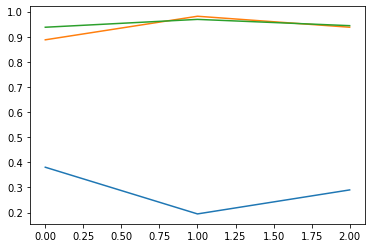

In [43]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['binary_accuracy'].plot()
history_df['val_binary_accuracy'].plot()

In [ ]:
train("chestLPOSTprocessed")

In [ ]:
train("chestRANTprocessed")

In [ ]:
train("chestRPOSTprocessed")